In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [2]:
##Either use this(will need active internet), or use downloaded dataset from tingo as stock.csv


# Fetch stock data
from pandas_datareader import tiingo
from tiingo import TiingoClient

config = {'api_key': '40f3f938aff088a28cb62bc8dc304ed4ed404985'}

client = TiingoClient(config)

stock_symbol = 'GOOG'
start_date = '2020-01-01'
end_date = '2021-12-31'

df = client.get_dataframe(stock_symbol, startDate=start_date, endDate=end_date)
df = df.reset_index()


In [3]:
#thisss will download and save tingo dataset as 'stock.csv'
#df.to_csv('stock.csv')

In [4]:
#df=pd.read_csv('stock.csv') 

In [5]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2020-01-02 00:00:00+00:00,1367.37,1368.14,1341.550,1341.55,1406731,68.3685,68.4070,67.0775,67.0775,28134620,0.0,1.0
1,2020-01-03 00:00:00+00:00,1360.66,1372.50,1345.544,1347.86,1187006,68.0330,68.6250,67.2772,67.3930,23740120,0.0,1.0
2,2020-01-06 00:00:00+00:00,1394.21,1396.50,1350.000,1350.00,1733149,69.7105,69.8250,67.5000,67.5000,34662980,0.0,1.0
3,2020-01-07 00:00:00+00:00,1393.34,1402.99,1390.380,1397.94,1511693,69.6670,70.1495,69.5190,69.8970,30233860,0.0,1.0
4,2020-01-08 00:00:00+00:00,1404.32,1411.58,1390.840,1392.08,1529177,70.2160,70.5790,69.5420,69.6040,30583540,0.0,1.0


In [6]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
500,2021-12-27 00:00:00+00:00,2961.28,2968.530,2945.00,2949.27,662966,148.0640,148.42650,147.2500,147.4635,13259320,0.0,1.0
501,2021-12-28 00:00:00+00:00,2928.96,2967.490,2918.71,2967.49,931792,146.4480,148.37450,145.9355,148.3745,18635840,0.0,1.0
502,2021-12-29 00:00:00+00:00,2930.09,2943.675,2910.09,2928.59,851236,146.5045,147.18375,145.5045,146.4295,17024720,0.0,1.0
503,2021-12-30 00:00:00+00:00,2920.05,2941.250,2915.17,2929.00,648851,146.0025,147.06250,145.7585,146.4500,12977020,0.0,1.0
504,2021-12-31 00:00:00+00:00,2893.59,2927.300,2893.55,2910.88,847077,144.6795,146.36500,144.6775,145.5440,16941540,0.0,1.0


In [7]:
#stock_symbol = 'GOOG'
#start_date = '2020-01-01'
#end_date = '2021-12-31'
#df = df.reset_index()

In [8]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2020-01-02 00:00:00+00:00,1367.37,1368.14,1341.550,1341.55,1406731,68.3685,68.4070,67.0775,67.0775,28134620,0.0,1.0
1,2020-01-03 00:00:00+00:00,1360.66,1372.50,1345.544,1347.86,1187006,68.0330,68.6250,67.2772,67.3930,23740120,0.0,1.0
2,2020-01-06 00:00:00+00:00,1394.21,1396.50,1350.000,1350.00,1733149,69.7105,69.8250,67.5000,67.5000,34662980,0.0,1.0
3,2020-01-07 00:00:00+00:00,1393.34,1402.99,1390.380,1397.94,1511693,69.6670,70.1495,69.5190,69.8970,30233860,0.0,1.0
4,2020-01-08 00:00:00+00:00,1404.32,1411.58,1390.840,1392.08,1529177,70.2160,70.5790,69.5420,69.6040,30583540,0.0,1.0


In [9]:
# Data preprocessing
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df1 = df['close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(df1)

training_size = int(len(df1) * 0.65)
train_data, test_data = df1[0:training_size], df1[training_size:]


In [10]:
# Create sequences for LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [11]:
# LSTM Model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

2023-08-06 04:39:22.818271: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-08-06 04:39:22.818294: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-06 04:39:22.818299: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-06 04:39:22.818329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-06 04:39:22.818343: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 64)           16896     
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           33024     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 83009 (324.25 KB)
Trainable params: 83009 (324.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
#from tensorflow.keras.callbacks import EarlyStopping

In [14]:
# Model training
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)
# Model training with early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=120, batch_size=64, verbose=1, callbacks=[early_stopping])


Epoch 1/100


2023-08-06 04:39:24.820108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-06 04:39:25.026621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-06 04:39:25.079632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-06 04:39:25.132485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-06 04:39:25.232487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-06 04:39:25.327715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-06 04:39:25.410308: I tensorflow/core/grappler/optimizers/cust

4/4 [==============================] - ETA: 0s - loss: 0.0916

2023-08-06 04:39:26.017676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-06 04:39:26.093263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-06 04:39:26.127756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-06 04:39:26.172937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 3s 262ms/step - loss: 0.0916 - val_loss: 0.1091
Epoch 2/100
4/4 [==============================] - 0s 84ms/step - loss: 0.0131 - val_loss: 0.0042
Epoch 3/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0060 - val_loss: 0.1399
Epoch 4/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0102 - val_loss: 0.0794
Epoch 5/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0050 - val_loss: 0.0108
Epoch 6/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0057 - val_loss: 0.0283
Epoch 7/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0037 - val_loss: 0.0522
Epoch 8/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0037 - val_loss: 0.0248
Epoch 9/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0028 - val_loss: 0.0055
Epoch 10/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0026 - val_loss: 0.0074
Epoch 11/100
4/4 [============

In [15]:
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

2023-08-06 04:39:41.497964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-06 04:39:41.574698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-06 04:39:41.615386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-06 04:39:41.669347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 25ms/step


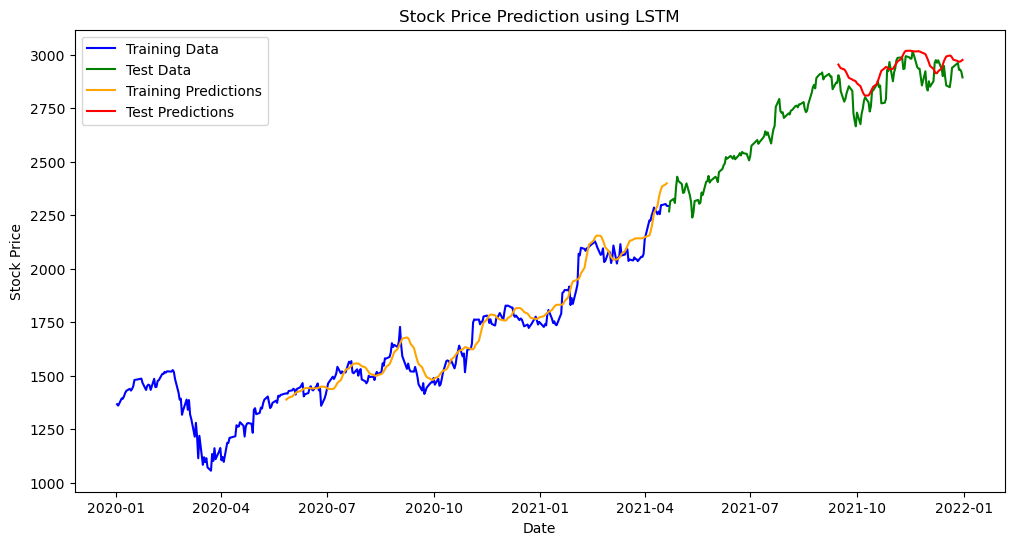

In [16]:
# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(df.index[:len(train_data)], scaler.inverse_transform(train_data), label='Training Data', color='blue')
plt.plot(df.index[training_size:], scaler.inverse_transform(test_data), label='Test Data', color='green')

#aligning the indices
plt.plot(df.index[time_step:training_size-1], train_predict, label='Training Predictions', color='orange')

plt.plot(df.index[training_size + time_step + 1:], test_predict, label='Test Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()


In [17]:
# Future predictions
n_future = 70
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = time_step

for i in range(n_future):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
    else:
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())

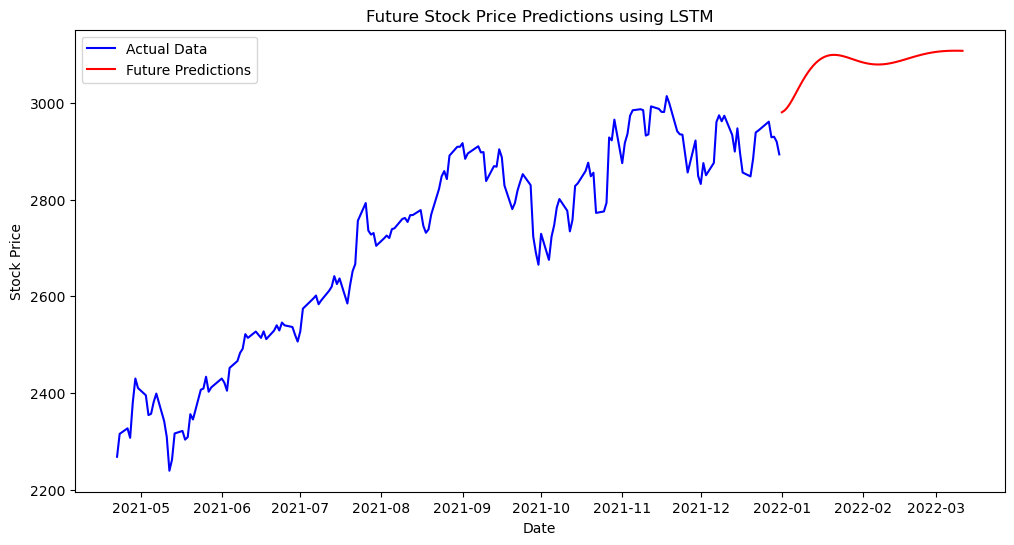

In [18]:
# Plot future predictions
day_new = df.index[training_size + time_step:]  # Use actual dates for the x-axis
day_pred = pd.date_range(start=df.index[-1], periods=n_future + 1, freq='D')[1:]  # Generate future dates

plt.figure(figsize=(12, 6))
plt.plot(df.index[training_size:], scaler.inverse_transform(test_data), label='Actual Data', color='blue')
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Future Predictions', color='red')
plt.xlabel('Date')  # Use 'Date' instead of 'Days' since it's a time series
plt.ylabel('Stock Price')
plt.title('Future Stock Price Predictions using LSTM')
plt.legend()
plt.show()


In [19]:
#pip install yfinance
#pip install tiingo